In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
import random
from functools import reduce
import geopandas as gpd
import matplotlib.pyplot as plt
from textwrap import wrap
import random
from functools import reduce

In [2]:
pneumo_deaths_df=pd.read_excel('pneumo_hib_2000-2015_data/pneumococcal_deaths_2000-2015.xlsx')
pneumo_deaths_df['Spn pneumonia deaths']=[float(i.split('(')[0]) for i in pneumo_deaths_df['Spn pneumonia deaths']]
pneumo_deaths_df['Spn meningitis deaths']=[float(i.split('(')[0]) for i in pneumo_deaths_df['Spn meningitis deaths']]
pneumo_deaths_df['Spn NPNM deaths']=[float(i.split('(')[0]) for i in pneumo_deaths_df['Spn NPNM deaths']]
print(len(pneumo_deaths_df['State'].values))

hib_deaths_df=pd.read_excel('pneumo_hib_2000-2015_data/hib_deaths_2000-2015.xlsx')
hib_deaths_df['Hib pneumonia deaths']=[float(i.split('(')[0]) for i in hib_deaths_df['Hib pneumonia deaths']]
hib_deaths_df['Hib meningitis deaths']=[float(i.split('(')[0]) for i in hib_deaths_df['Hib meningitis deaths']]
hib_deaths_df['Hib NPNM deaths']=[float(i.split('(')[0]) if type(i)!=int else float(i) for i in hib_deaths_df['Hib NPNM deaths']]
print(len(hib_deaths_df['State'].values))

state_region=pd.read_excel('pneumo_hib_2000-2015_data/states_by_region.xlsx')
print([i for i in pneumo_deaths_df['State'] if i not in state_region['state/territory'].values])
print([i for i in hib_deaths_df['State'] if i not in state_region['state/territory'].values])
pneumo_deaths_df = pd.merge(pneumo_deaths_df, state_region,  how='left', left_on=['State'], right_on = ['state/territory'])
pneumo_deaths_df = pneumo_deaths_df.dropna()

hib_deaths_df = pd.merge(hib_deaths_df, state_region,  how='left', left_on=['State'], right_on = ['state/territory'])
hib_deaths_df = hib_deaths_df.dropna()

480
393
['Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory']
['Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory']


In [122]:
pneumo_deaths_df=pneumo_deaths_df.groupby(['Region','Year']).sum().reset_index()
pneumo_deaths_df['pneumo_deaths']=pneumo_deaths_df.iloc[:,2:].sum(axis=1)
pneumo_deaths_df=pneumo_deaths_df.loc[:,['Region','Year','pneumo_deaths']]
pneumo_deaths_df

,Region,Year,pneumo_deaths
0,Central,2000,19938.0
1,Central,2001,19198.0
2,Central,2002,18441.0
3,Central,2003,17669.0
4,Central,2004,16821.0
...,...,...,...
91,Western,2011,6351.0
92,Western,2012,5751.0
93,Western,2013,5283.0
94,Western,2014,4827.0


In [130]:
hib_deaths_df=hib_deaths_df.groupby(['Region','Year']).sum().reset_index()
hib_deaths_df['hib_deaths']=hib_deaths_df.iloc[:,2:].sum(axis=1)
hib_deaths_df=hib_deaths_df.loc[:,['Region','Year','hib_deaths']]

In [136]:
combined_df=pd.merge(pneumo_deaths_df,hib_deaths_df,  how='left', left_on=['Region','Year'], right_on = ['Region','Year'])

In [155]:
np.unique(combined_df['Region'])

array(['Central', 'Eastern', 'Northeastern', 'Northern', 'Southern',
       'Western'], dtype=object)

In [180]:
combined_df

,Region,Year,pneumo_deaths,hib_deaths
0,Central,2000,19938.0,1706.0
1,Central,2001,19198.0,1690.0
2,Central,2002,18441.0,1640.0
3,Central,2003,17669.0,1587.0
4,Central,2004,16821.0,1506.0
...,...,...,...,...
91,Western,2011,6351.0,3384.0
92,Western,2012,5751.0,3130.0
93,Western,2013,5283.0,1090.0
94,Western,2014,4827.0,354.0


In [158]:
187/19938.0

0.009379075132912027

In [216]:
pneumo_dict=dict()
hib_dict=dict()

pneumo_paper_mortality=dict()
pneumo_paper_mortality['Central']=187.6819026
pneumo_paper_mortality['Eastern']=131.6722423
pneumo_paper_mortality['Western']=84.03621159
pneumo_paper_mortality['Northeastern']=126.5549276
pneumo_paper_mortality['Southern']=72.40626697
pneumo_paper_mortality['Northern']=105.0629446




pneumo_scale=dict()
hib_scale=dict()
for region in np.unique(combined_df['Region']):
    pneumo_dict[region]=[]
    hib_dict[region]=[]
    
for row in combined_df.iterrows():
    if row[1]['Year']==2000:
        pneumo_scale[row[1]['Region']]=pneumo_paper_mortality[row[1]['Region']]/row[1]['pneumo_deaths']


for row in combined_df.iterrows():
    pneumo_dict[row[1]['Region']]+=[row[1]['pneumo_deaths']*pneumo_scale[row[1]['Region']]]
    hib_dict[row[1]['Region']]+=[row[1]['hib_deaths']]

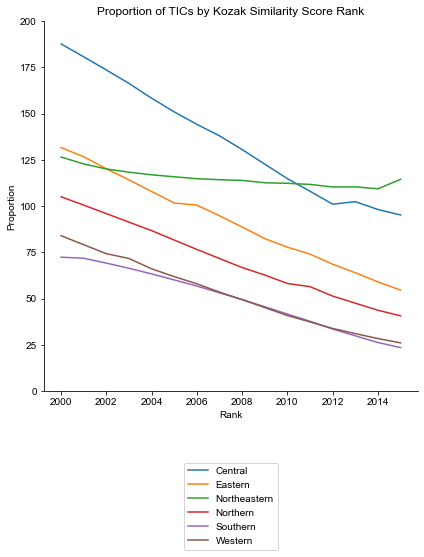

In [217]:
#import seaborn as sns
#plt.style.use('seaborn-colorblind')
font = {'fontname':'Arial'}  
plt.rc('font',family='Arial')
fig= plt.figure()
ax= fig.add_subplot(111)

years=range(2000,2016,1)

for region in pneumo_dict:
    
    ax.plot(years,pneumo_dict[region],alpha=1,
          label = region,linewidth=1.5)
    

title = ax.set_title("\n".join(wrap('Proportion of TICs by Kozak Similarity Score Rank', 1000)))
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.18))
plt.xlabel("Rank")
plt.ylabel("Proportion")
fig.set_size_inches(6, 8)
plt.ylim(0,200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig('Fig3.svg')
plt.show()

In [124]:
pneumo_deaths_df=pd.read_excel('pneumo_hib_2000-2015_data/pneumococcal_deaths_2000-2015.xlsx')
pneumo_deaths_df['Spn pneumonia deaths']=[float(i.split('(')[0]) for i in pneumo_deaths_df['Spn pneumonia deaths']]
pneumo_deaths_df['Spn meningitis deaths']=[float(i.split('(')[0]) for i in pneumo_deaths_df['Spn meningitis deaths']]
pneumo_deaths_df['Spn NPNM deaths']=[float(i.split('(')[0]) for i in pneumo_deaths_df['Spn NPNM deaths']]
print(len(pneumo_deaths_df['State'].values))

hib_deaths_df=pd.read_excel('pneumo_hib_2000-2015_data/hib_deaths_2000-2015.xlsx')
hib_deaths_df['Hib pneumonia deaths']=[float(i.split('(')[0]) for i in hib_deaths_df['Hib pneumonia deaths']]
hib_deaths_df['Hib meningitis deaths']=[float(i.split('(')[0]) for i in hib_deaths_df['Hib meningitis deaths']]
hib_deaths_df['Hib NPNM deaths']=[float(i.split('(')[0]) if type(i)!=int else float(i) for i in hib_deaths_df['Hib NPNM deaths']]
print(len(hib_deaths_df['State'].values))

state_region=pd.read_excel('pneumo_hib_2000-2015_data/states_by_region.xlsx')
print([i for i in pneumo_deaths_df['State'] if i not in state_region['state/territory'].values])
print([i for i in hib_deaths_df['State'] if i not in state_region['state/territory'].values])

480
393
['Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory']
['Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory', 'Union Territory']


In [125]:
hib_deaths_df['State']=[i.lower() for i in hib_deaths_df['State']]

In [126]:
array_add=[]
for i in ['andaman & nicobar islands', 'dadra & nagar haveli and daman & diu', 'chandigarh', 'telangana', 'lakshadweep', 'puducherry', 'ladakh']:
    vals_change=hib_deaths_df[hib_deaths_df['State']=='union territory'].values
    for x in range(vals_change.shape[0]):
        vals_change[x][1]=i
    array_add+=vals_change.tolist()

In [127]:
hib_deaths_df=pd.DataFrame(data=hib_deaths_df.values.tolist()+array_add,columns=hib_deaths_df.columns)

In [128]:
hib_deaths_df['tot_hib_deaths']=hib_deaths_df.iloc[:,2:].sum(axis=1)

In [129]:
pneumo_deaths_df['State']=[i.lower() for i in pneumo_deaths_df['State']]

In [130]:
array_add=[]
for i in ['andaman & nicobar islands', 'dadra & nagar haveli and daman & diu', 'chandigarh', 'telangana', 'lakshadweep', 'puducherry', 'ladakh']:
    vals_change=pneumo_deaths_df[pneumo_deaths_df['State']=='union territory'].values
    for x in range(vals_change.shape[0]):
        vals_change[x][1]=i
    array_add+=vals_change.tolist()

In [131]:
pneumo_deaths_df=pd.DataFrame(data=pneumo_deaths_df.values.tolist()+array_add,columns=pneumo_deaths_df.columns)

In [132]:
geo_df = gpd.read_file('India_State_Shapefile/India_State_Boundary.shp')

In [133]:
dict_states_replace=dict()

dict_states_replace['andaman & nicobar']='andaman & nicobar islands'
dict_states_replace['daman and diu and dadra and nagar haveli']='dadra & nagar haveli and daman & diu'
dict_states_replace['tamilnadu']='tamil nadu'
dict_states_replace['chhattishgarh']='chhattisgarh'
dict_states_replace['telengana']='telangana'
dict_states_replace['jammu and kashmir']='jammu & kashmir'

In [134]:
names_replaced=[]

for name in geo_df['Name']:
    try:
        names_replaced+=[dict_states_replace[name.lower()]]
    except:
        names_replaced+=[name.lower()]
        
geo_df['Name']=names_replaced #Adusted state names so that they are consistent between the geopandas DataFrame and
                                #the naming in the ABM (so that DataFrames can be merged at the state level)

In [135]:
print([i for i in pneumo_deaths_df['State'].values if i not in ABM_states], #Double check that names are consistent
[i for i in ABM_states if i not in pneumo_deaths_df['State'].values])

['union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory', 'union territory'] []


In [136]:
print([i for i in geo_df['Name'].values if i not in ABM_states], #Double check that names are consistent
[i for i in ABM_states if i not in geo_df['Name'].values])

[] []


In [137]:
pneumo_deaths_df['tot_pneumo_deaths']=pneumo_deaths_df.iloc[:,2:].sum(axis=1)

In [138]:
pneumo_deaths_df.rename(columns={'State':"Name"},inplace=True)
hib_deaths_df.rename(columns={'State':"Name"},inplace=True)

In [139]:
compiled_df=reduce(lambda x,y: pd.merge(x,y, on='Name', how='outer'), [geo_df, pneumo_deaths_df,hib_deaths_df])

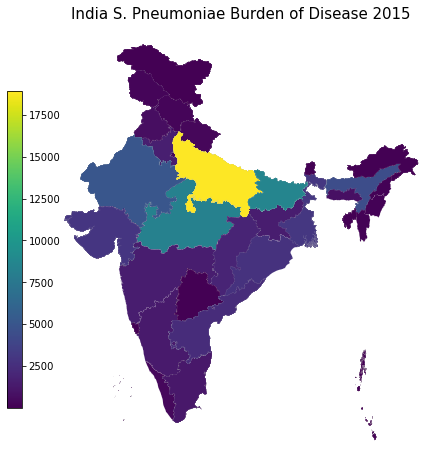

In [141]:
compiled_df_2015=compiled_df[compiled_df['Year_x']==2015]
title = "\n".join(wrap("India S. Pneumoniae Burden of Disease 2015", 50))
col = 'tot_pneumo_deaths'
cmap='viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))

ax.axis('off')
compiled_df_2015.plot(column=col, ax=ax,edgecolor='0.8', linewidth=0.05, cmap=cmap,missing_kwds={'color': 'lightgrey'})

ax.set_title(title, fontdict={'fontsize': '15', 'fontweight': '3'})


# Create colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=compiled_df_2015[col].min(), vmax=compiled_df_2015[col].max()), cmap=cmap)

# Add colorbar to figure
cbaxes = fig.add_axes([0.35, 0.215, 0.01, 0.55])
cbar = fig.colorbar(sm, cax=cbaxes)
#plt.savefig('Figures/Proportion of Total Antibiotic Consumption by State Due to Streptococcus Pneumoniae.svg',facecolor='white',bbox_inches='tight')

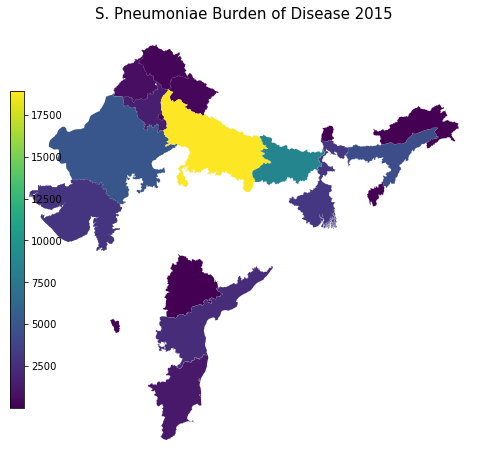

In [168]:
states_compiled=states_compiled[states_compiled['Year_x']==2015]
title = "\n".join(wrap("S. Pneumoniae Burden of Disease 2015", 50))
col = 'tot_pneumo_deaths'
cmap='viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))

ax.axis('off')
states_compiled.plot(column=col, ax=ax,edgecolor='0.8', linewidth=0.05, cmap=cmap,missing_kwds={'color': 'lightgrey'})

ax.set_title(title, fontdict={'fontsize': '15', 'fontweight': '3'})


# Create colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=states_compiled[col].min(), vmax=states_compiled[col].max()), cmap=cmap)

# Add colorbar to figure
cbaxes = fig.add_axes([0.35, 0.215, 0.01, 0.55])
cbar = fig.colorbar(sm, cax=cbaxes)
#plt.savefig('Figures/Proportion of Total Antibiotic Consumption by State Due to Streptococcus Pneumoniae.svg',facecolor='white',bbox_inches='tight')

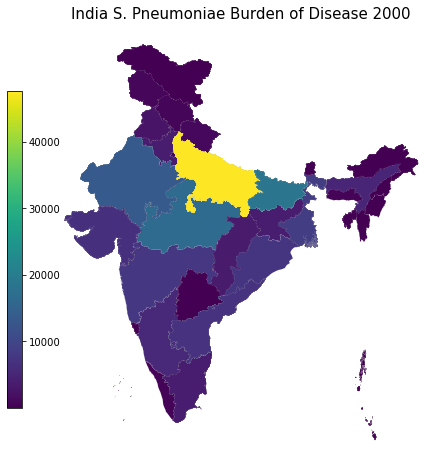

In [143]:
compiled_df_2000=compiled_df[compiled_df['Year_x']==2000]
title = "\n".join(wrap("India S. Pneumoniae Burden of Disease 2000", 50))
col = 'tot_pneumo_deaths'
cmap='viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))

ax.axis('off')
compiled_df_2000.plot(column=col, ax=ax,edgecolor='0.8', linewidth=0.05, cmap=cmap,missing_kwds={'color': 'lightgrey'})

ax.set_title(title, fontdict={'fontsize': '15', 'fontweight': '3'})


# Create colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=compiled_df_2000[col].min(), vmax=compiled_df_2000[col].max()), cmap=cmap)

# Add colorbar to figure
cbaxes = fig.add_axes([0.35, 0.215, 0.01, 0.55])
cbar = fig.colorbar(sm, cax=cbaxes)
#plt.savefig('Figures/Proportion of Total Antibiotic Consumption by State Due to Streptococcus Pneumoniae.svg',facecolor='white',bbox_inches='tight')

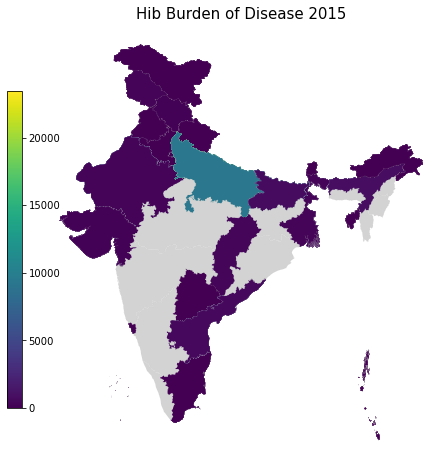

In [146]:
compiled_df_2015=compiled_df[compiled_df['Year_x']==2015]
title = "\n".join(wrap("Hib Burden of Disease 2015", 50))
col = 'tot_hib_deaths'
cmap='viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))

ax.axis('off')
compiled_df_2015.plot(column=col, ax=ax,edgecolor='0.8', linewidth=0.05, cmap=cmap,missing_kwds={'color': 'lightgrey'})

ax.set_title(title, fontdict={'fontsize': '15', 'fontweight': '3'})


# Create colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=compiled_df_2015[col].min(), vmax=compiled_df_2015[col].max()), cmap=cmap)

# Add colorbar to figure
cbaxes = fig.add_axes([0.35, 0.215, 0.01, 0.55])
cbar = fig.colorbar(sm, cax=cbaxes)
#plt.savefig('Figures/Proportion of Total Antibiotic Consumption by State Due to Streptococcus Pneumoniae.svg',facecolor='white',bbox_inches='tight')

In [163]:
states_compiled=compiled_df[~(compiled_df['Name'].isin(['andaman & nicobar islands','dadra & nagar haveli and daman & diu','union territory','chhattisgarh','chandigarh','lakshadweep','ladakh']))]

In [162]:
np.unique(states_compiled['Name'])

array(['andaman & nicobar islands', 'andhra pradesh', 'arunachal pradesh',
       'assam', 'bihar', 'dadra & nagar haveli and daman & diu', 'delhi',
       'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir',
       'jharkhand', 'karnataka', 'kerala', 'madhya pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'telangana', 'tripura', 'uttar pradesh',
       'uttarakhand', 'west bengal'], dtype=object)

In [166]:
states_compiled[states_compiled['Year_x']==2015]

,Name,Type,geometry,Year_x,Spn pneumonia deaths,Spn meningitis deaths,Spn NPNM deaths,tot_pneumo_deaths,Year_y,Hib pneumonia deaths,Hib meningitis deaths,Hib NPNM deaths,tot_hib_deaths
240,west bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",2015,2280.0,363.0,323.0,2966.0,2000.0,2965.0,1009.0,8.0,3982.0
241,west bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",2015,2280.0,363.0,323.0,2966.0,2001.0,2708.0,922.0,7.0,3637.0
242,west bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",2015,2280.0,363.0,323.0,2966.0,2002.0,2438.0,830.0,7.0,3275.0
243,west bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",2015,2280.0,363.0,323.0,2966.0,2003.0,2203.0,750.0,6.0,2959.0
244,west bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",2015,2280.0,363.0,323.0,2966.0,2004.0,2005.0,682.0,5.0,2692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,jammu & kashmir,Union Territory,"POLYGON ((76.80933 33.24349, 76.80894 33.24367...",2015,205.0,33.0,29.0,267.0,2008.0,177.0,60.0,0.0,237.0
7965,jammu & kashmir,Union Territory,"POLYGON ((76.80933 33.24349, 76.80894 33.24367...",2015,205.0,33.0,29.0,267.0,2009.0,165.0,56.0,0.0,221.0
7966,jammu & kashmir,Union Territory,"POLYGON ((76.80933 33.24349, 76.80894 33.24367...",2015,205.0,33.0,29.0,267.0,2010.0,152.0,51.0,0.0,203.0
7967,jammu & kashmir,Union Territory,"POLYGON ((76.80933 33.24349, 76.80894 33.24367...",2015,205.0,33.0,29.0,267.0,2011.0,138.0,47.0,0.0,185.0


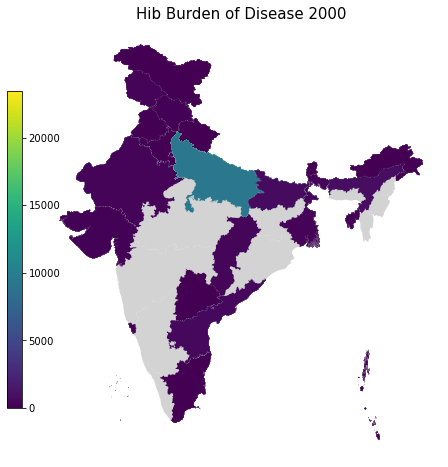

In [147]:
compiled_df_2000=compiled_df[compiled_df['Year_x']==2000]
title = "\n".join(wrap("Hib Burden of Disease 2000", 50))
col = 'tot_hib_deaths'
cmap='viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))

ax.axis('off')
compiled_df_2000.plot(column=col, ax=ax,edgecolor='0.8', linewidth=0.05, cmap=cmap,missing_kwds={'color': 'lightgrey'})

ax.set_title(title, fontdict={'fontsize': '15', 'fontweight': '3'})


# Create colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=compiled_df_2000[col].min(), vmax=compiled_df_2000[col].max()), cmap=cmap)

# Add colorbar to figure
cbaxes = fig.add_axes([0.35, 0.215, 0.01, 0.55])
cbar = fig.colorbar(sm, cax=cbaxes)
#plt.savefig('Figures/Proportion of Total Antibiotic Consumption by State Due to Streptococcus Pneumoniae.svg',facecolor='white',bbox_inches='tight')